In [5]:
import pandas as pd
import numpy as np


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [33]:
train.shape

(42000, 785)

In [8]:
X = train.drop('label', axis=1)
X.shape

(42000, 784)

In [11]:
y = train['label']
y.shape

(42000,)

In [34]:
test.shape

(28000, 784)

In [4]:
len(train.iloc[1, 1:].values)
train.iloc[1, 1:].values.reshape(28,28).shape

(28, 28)

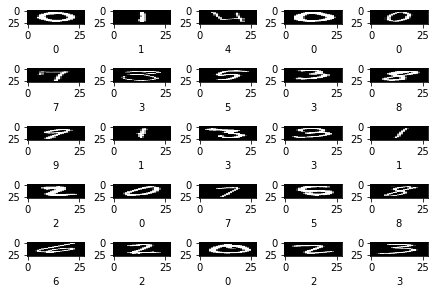

In [32]:

# plot digital
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

for i in range(1, 26):
    plt.subplot(5,5,i)
    row = train.iloc[i, 1:].values.reshape(28,28)
    plt.imshow(row, cmap=plt.get_cmap('gray'), aspect='auto')
    plt.xlabel(train.iloc[i,0])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    



In [22]:
from keras.utils import to_categorical
to_categorical(y, num_classes=10)


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [33]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

X = train.drop('label', axis=1)
y = to_categorical(train['label'], num_classes=10)


model.fit(X, y)

Epoch 1/1
42000/42000 [==============================] - 5s 118us/step - loss: 0.9201 - acc: 0.8130


In [67]:
pred=model.predict(test)
pred.shape



(28000, 10)

In [74]:
result = [np.argmax(y, axis=None, out=None) for y in pred]
len(result)
i = list(range(1, len(result)+1))

d={'ImageId': i, 'Label': result}

df = pd.DataFrame(d)
df.to_csv('./result.csv', index=False)